# Single-cell RNA Sequencing of Lung Samples from COVID-19 Decedents and Control Individuals

**Data Source Acknowledgment:**

The dataset is sourced from [GSE171524](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE171524). This dataset comprises single-nuclei RNA sequencing data from 116,314 cells collected from 20 frozen lungs obtained from 19 individuals who died from COVID-19 and 7 control patients. It's essential to emphasize that this dataset is exclusively utilized for Python practice purposes within this repository.

In [2]:
#unzip .tar
#!tar -xf GSE171524_RAW.tar
#!gunzip GSM5226574_C51ctr_raw_counts.csv.gz

In [3]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Reading and creating AnnData object

In [4]:
#read a file using Scanpy
#it's necessary to transpose it because Scanpy requires genes as columns and cells as rows
adata = sc.read_csv('GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [5]:
#first component = observation (df)
adata.obs

""
TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1
...
CGCCATTGTTTGCCGG-1_1
CACTGGGGTCTACGTA-1_1
CATACTTGTAGAGGAA-1_1
TTTGGTTTCCACGGAC-1_1


In [6]:
#second component = variables/genes (df)
adata.var

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [7]:
#third component = data matrix (numpy array)
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 2. Doublet removal (optional)
Two additional cells can be present in the same droplet. I will use scvi-tools, a package for probabilistic modeling of single-cell omics data, which is built on top of PyTorch and AnnData. First, I will create a dataframe for doublets, and then list the indices of these doublets. After that, I will remove these indices from the 'adata

In [8]:
#scvi will be used to predict whether a cell is doublet or not
import scvi

In [9]:
#narrow down the genes by filtering genes based on number of cells
sc.pp.filter_genes(adata ,min_cells=10)

In [14]:
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [13]:
#I will keep only 2000 top variable genes which can descibe the data
#Highly variable genes are genes whose expression levels vary significantly 
#across individual cells within a population. 

sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')

In [15]:
#predict the doublet
#use default model
scvi.model.SCVI.setup_anndata(adata)
#train the model
vae = scvi.model.SCVI(adata)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Applications/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 400/400: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [14:32<00:00,  2.05s/it, v_num=1, train_loss_step=329, train_loss_epoch=324]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [14:32<00:00,  2.18s/it, v_num=1, train_loss_step=329, train_loss_epoch=324]


In [16]:
#after SCVI trained, the solo model which predict droublet will be trained by passing vae
# scvi.external.SOLO : Doublet detection in scRNA-seq
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Applications/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Applications/anaconda3/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Epoch 143/400:  36%|████████████████████████████████▉                                                           | 143/400 [00:57<01:43,  2.49it/s, v_num=1, train_loss_step=0.224, train_loss_epoch=0.301]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.280. Signaling Trainer to stop.


In [119]:
#Return doublet predictions
df_prediction = solo.predict()
df_prediction.to_csv('df_prediction.csv', index=True) 

In [121]:
#add prediction label (soft=False => return class labels as doublet pr singlet)
df_prediction['prediction'] = solo.predict(soft=False)
df_prediction

,doublet,singlet,prediction
TAGGTACCATGGCCAC-1_1,0.255841,-0.438761,doublet
ATTCACTGTAACAGGC-1_1,0.687152,-1.170110,doublet
TAACTTCCAACCACGC-1_1,-0.020706,-0.330602,doublet
TTGGGTACACGACAAG-1_1,0.950293,-1.178556,doublet
AGGCCACAGAGTCACG-1_1,0.573513,-0.904042,doublet
...,...,...,...
CGCCATTGTTTGCCGG-1_1,-1.468524,1.969313,singlet
CACTGGGGTCTACGTA-1_1,-2.692539,2.721479,singlet
CATACTTGTAGAGGAA-1_1,-1.860980,2.147750,singlet
TTTGGTTTCCACGGAC-1_1,-2.403992,2.453446,singlet


In [122]:
df_prediction.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,978,978
singlet,5121,5121


In [123]:
#calculate diff between doublet score and singlet score
df_prediction['diff'] = df_prediction.doublet - df_prediction.singlet
df_prediction

,doublet,singlet,prediction,diff
TAGGTACCATGGCCAC-1_1,0.255841,-0.438761,doublet,0.694602
ATTCACTGTAACAGGC-1_1,0.687152,-1.170110,doublet,1.857262
TAACTTCCAACCACGC-1_1,-0.020706,-0.330602,doublet,0.309896
TTGGGTACACGACAAG-1_1,0.950293,-1.178556,doublet,2.128850
AGGCCACAGAGTCACG-1_1,0.573513,-0.904042,doublet,1.477555
...,...,...,...,...
CGCCATTGTTTGCCGG-1_1,-1.468524,1.969313,singlet,-3.437837
CACTGGGGTCTACGTA-1_1,-2.692539,2.721479,singlet,-5.414019
CATACTTGTAGAGGAA-1_1,-1.860980,2.147750,singlet,-4.008730
TTTGGTTTCCACGGAC-1_1,-2.403992,2.453446,singlet,-4.857439


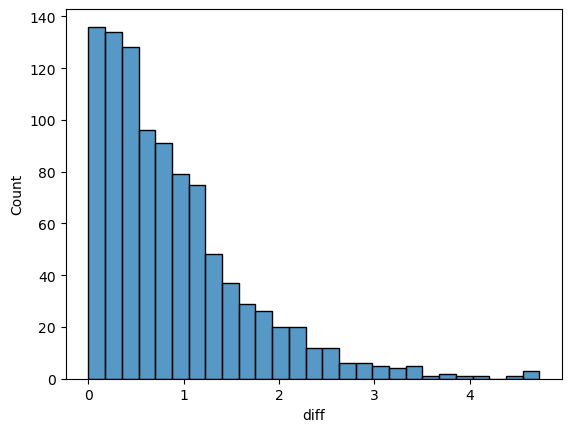

In [124]:
sns.histplot(df_prediction[df_prediction['prediction'] == 'doublet'], x='diff')
plt.show()

In [125]:
#filter out the doublet that has diff > 1

df_doublet = df_prediction[(df_prediction.prediction == 'doublet') & (df_prediction['diff'] > 1)]
df_doublet

,doublet,singlet,prediction,diff
ATTCACTGTAACAGGC-1_1,0.687152,-1.170110,doublet,1.857262
TTGGGTACACGACAAG-1_1,0.950293,-1.178556,doublet,2.128850
AGGCCACAGAGTCACG-1_1,0.573513,-0.904042,doublet,1.477555
CACTGAAGTCGAAGCA-1_1,0.513347,-0.879247,doublet,1.392594
ACTGATGTCTGCACCT-1_1,0.473030,-1.147980,doublet,1.621010
...,...,...,...,...
CCTCCTCGTGTGGACA-1_1,0.864986,-0.660994,doublet,1.525980
TAACTTCGTCATCGGC-1_1,0.827234,-0.224619,doublet,1.051853
TTGCTGCAGTGCGACA-1_1,0.502505,-0.718050,doublet,1.220555
ATCAGGTGTCGTCTCT-1_1,0.848040,-0.313997,doublet,1.162037


In [126]:
#adata is not orginal one
adata

AnnData object with n_obs × n_vars = 6099 × 34546
    obs: 'doublet'

In [127]:
#i need to reload adata again
adata = sc.read_csv('GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [128]:
adata.obs['doublet'] = adata.obs.index.isin(df_doublet.index)
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,False
ATTCACTGTAACAGGC-1_1,True
TAACTTCCAACCACGC-1_1,False
TTGGGTACACGACAAG-1_1,True
AGGCCACAGAGTCACG-1_1,True
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


In [129]:
#filter all cells with doublet label out (keep only false)
# ~ means to keep FALSE
adata = adata[~adata.obs.doublet]
adata.obs

,doublet
TAGGTACCATGGCCAC-1_1,False
TAACTTCCAACCACGC-1_1,False
TTACCGCCACTCAGAT-1_1,False
TTGGTTTTCCTAGCTC-1_1,False
TGGGAAGTCAGTGATC-1_1,False
...,...
CGCCATTGTTTGCCGG-1_1,False
CACTGGGGTCTACGTA-1_1,False
CATACTTGTAGAGGAA-1_1,False
TTTGGTTTCCACGGAC-1_1,False


# 3. Preprocessing